## Renaming & Combining

In [1]:
import pandas as pd
reviews = pd.read_csv("./src/winemag-data-130k-v2.csv", index_col=0)

In [18]:
#Renaming columns
reviews.rename(columns={'points':'something'}) #This returns a dataframe but the dataframe itself doesn't change
#so to assign it could be like? 
x = reviews.rename(columns={'points':'something'})
#yep and reviews is not affected
x.iloc[0,x.columns.get_loc('country')] = 'Lol'
x.iloc[:, x.columns.get_loc('country')] = 'sommmmmm'

x

,country,description,designation,something,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,sommmmmm,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,sommmmmm,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,sommmmmm,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,sommmmmm,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,sommmmmm,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,sommmmmm,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,sommmmmm,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,sommmmmm,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,sommmmmm,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
#get the indx of the column 
x.columns.get_loc('country')

In [46]:
#example using it to rename some elements of the index.
reviews.rename(index={0:'first Entry',1:'Second Entry'}) #one more time this doesn't apply directly to the reviews df
y = reviews.rename_axis("Value",axis="rows") #y.index.name
y = reviews.rename_axis('ValueColumn',axis="columns") #we lost value row axis value
#we can perform this action in a single line of code
y = reviews.rename_axis("RowVal",axis="rows").rename_axis("colVal",axis="columns") # i see
y.country.name #lol 
y.columns.name #col val
y.index.name#row val 

'RowVal'

## Combinig
Pandas has three core methods for doing this. In order of increasing complexity, these are concat(), join(), and merge()

In [67]:
#concat
#The simplest combining method is concat(). Given a list of elements, this function will smush those elements together along an axis.
canadian_youtube = pd.read_csv("./src/CAvideos.csv")
british_youtube = pd.read_csv("./src/GBvideos.csv")
canadian_youtube.columns
british_youtube.columns
#concat by default concat by rows you can make it for columns too 
pd.concat([canadian_youtube,british_youtube]).size


1276752

In [69]:

pd.concat([canadian_youtube,british_youtube.rename(columns={'title':'titlee'})]).size #both of the df has the same # of columns and names
#nevermind, bot that are the same column name, are smush aplastr
#but in this case titleee are apart with lots of "NaN" values 
#_.size


1356549

In [79]:
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c']})
df2 = pd.DataFrame({'A': [4, 5, 6], 'B': ['d', 'e', 'f']})

result = pd.concat([df1, df2]) #we'll get an 0 1 2 0 1 2 indexex so if we want 0 1 2 3 4 5.. we put
pd.concat([df1,df2],ignore_index=True)
# result.reset_index()

,A,B
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e
5,6,f


In [98]:
#Join 
#its going to join based on the index 
df1 = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c']}, index=[0, 1, 2])
df2 = pd.DataFrame({'A': ['x', 'y', 'z'], 'D': [4, 5, 6]}, index=[1, 2, 3])

# df1
# df2
#its gonna be like "Hey Im index 0", whats index 0 on df2? , nothing 
#so the first row index 0 would be df1 1 a df2 NaN NaN

#now hey df1 now is index 1, whats on df2 index 1
# df2: I have x and 4 so the new row would be
# df1 2 b df2 x 4  == 2 b x 4 
#and so on so
# df1.join(df2)
x =  df1.join(df2,lsuffix='_left',rsuffix='_right') #this only works when having same name of columns
#so we can distinguish the value of left or right if not is going to keep the original column name


video_id_CAN   
title                                              trending_date                
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... 18.04.01       PNn8sECd7io  \
#1 Fortnite World Rank - 2,323 Solo Wins!          18.09.03       DvPW66IFhMI   
#1 Fortnite World Rank - 2,330 Solo Wins!          18.10.03       EXEaMjFeiEk   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... 17.20.12       bYvQmusLaxw   
                                                   17.21.12       bYvQmusLaxw   
...                                                                       ...   
😲She Is So Nervous But BLOWS The ROOF After Tak... 18.02.05       WttN1Z0XF4k   
                                                   18.29.04       WttN1Z0XF4k   
                                                   18.30.04       WttN1Z0XF4k   
🚨 BREAKING NEWS 🔴 Raja Live all Slot Channels W... 18.07.05       Wt9Gkpmbt44   
🚨Active Shooter at YouTube Headquarters - LIVE ... 18.04.04       Az72jrKbANA   

                                                                                channel_title_CAN   
title                                              trending_date                                    
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... 18.04.01                            Markiplier  \
#1 Fortnite World Rank - 2,323 Solo Wins!          18.09.03                        AlexRamiGaming   
#1 Fortnite World Rank - 2,330 Solo Wins!          18.10.03                        AlexRamiGaming   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... 17.20.12                  Pure Living for Life   
                                                   17.21.12                  Pure Living for Life   
...                                                                                           ...   
😲She Is So Nervous But BLOWS The ROOF After Tak... 18.02.05                          How Talented   
                                                   18.29.04                          How Talented   
                                                   18.30.04                          How Talented   
🚨 BREAKING NEWS 🔴 Raja Live all Slot Channels W... 18.07.05                         TheBigJackpot   
🚨Active Shooter at YouTube Headquarters - LIVE ... 18.04.04       Right Side Broadcasting Network   

                                                                  category_id_CAN   
title                                              trending_date                    
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... 18.04.01                    20  \
#1 Fortnite World Rank - 2,323 Solo Wins!          18.09.03                    20   
#1 Fortnite World Rank - 2,330 Solo Wins!          18.10.03                    20   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... 17.20.12                    24   
                                                   17.21.12                    24   
...                                                                           ...   
😲She Is So Nervous But BLOWS The ROOF After Tak... 18.02.05                    24   
                                                   18.29.04                    24   
                                                   18.30.04                    24   
🚨 BREAKING NEWS 🔴 Raja Live all Slot Channels W... 18.07.05                    24   
🚨Active Shooter at YouTube Headquarters - LIVE ... 18.04.04                    25   

                                                                          publish_time_CAN   
title                                              trending_date                             
!! THIS VIDEO IS NOTHING BUT PAIN !! | Getting ... 18.04.01       2018-01-03T19:33:53.000Z  \
#1 Fortnite World Rank - 2,323 Solo Wins!          18.09.03       2018-03-09T07:15:52.000Z   
#1 Fortnite World Rank - 2,330 Solo Wins!          18.10.03       2018-03-10T06:26:17.000Z   
#1 MOST ANTICIPATED VIDEO (Timber Frame House R... 17.20.12       2017-12-20T02:49:11.000Z   
                           

In [ ]:
left = canadian_youtube.set_index(['title', 'trending_date'])
right = british_youtube.set_index(['title', 'trending_date'])
left.join(right, lsuffix='_CAN', rsuffix='_UK')

In [ ]:
#merge
#shared columns -> value 

In [127]:

df1 = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c'], 'Key': ['K1', 'K2', 'K3']},index=[0,1,2])
df2 = pd.DataFrame({'C': ['x', 'y', 'z'], 'D': [4, 5, 6], 'Key': ['K2', 'K3', 'K4']},index=[1,2,3])

pd.merge(df1, df2, on='Key',how='inner') #by default inner join
pd.merge(df1, df2, on='Key',how='outer')
pd.merge(df1, df2, on='Key',how='left') # merge them


,A,B,Key,C,D
0,1,a,K1,NaN,NaN
1,2,b,K2,x,4.0
2,3,c,K3,y,5.0


In [129]:
xx =df1.join(df2,lsuffix='_left',rsuffix='_right') #when columns overlaps ened t apply lsuffic rsuffix yes or yes
# but the column key it appears twice so we cna drop ot maybe
xx.drop(['Key_left','Key_right'],axis=1)

,A,B,C,D
0,1,a,NaN,NaN
1,2,b,x,4.0
2,3,c,y,5.0


# Iner
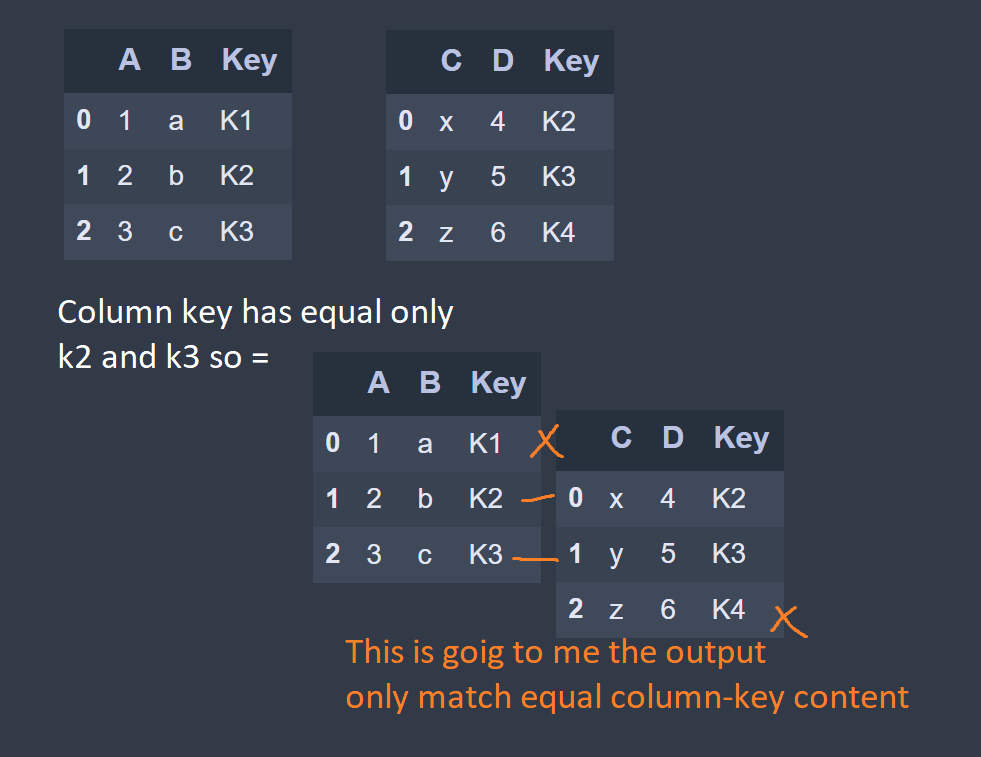

# Outer 
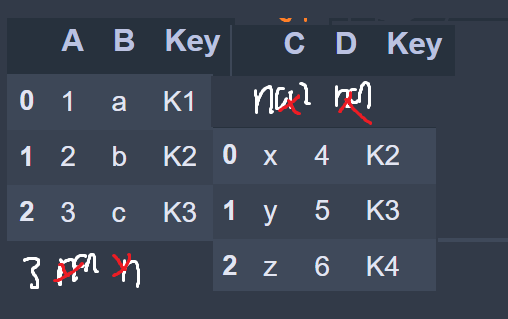